In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('housing.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
train_data = X_train.join(Y_train)
train_data




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8285,-118.14,33.77,51.0,2812.0,621.0,1171.0,566.0,3.8750,NEAR OCEAN,342900.0
5417,-118.43,34.01,43.0,1487.0,242.0,675.0,247.0,5.3403,<1H OCEAN,489800.0
1369,-122.13,38.00,33.0,2821.0,652.0,1206.0,640.0,2.5481,NEAR BAY,150800.0
821,-122.06,37.63,12.0,6711.0,1374.0,3388.0,1289.0,3.8625,NEAR BAY,208900.0
17484,-119.83,34.44,26.0,1739.0,402.0,599.0,368.0,3.0875,NEAR OCEAN,198400.0
...,...,...,...,...,...,...,...,...,...,...
18232,-122.11,37.41,27.0,5110.0,1599.0,2764.0,1482.0,3.4198,NEAR BAY,351900.0
4886,-118.26,34.02,48.0,1465.0,440.0,1859.0,400.0,1.3134,<1H OCEAN,96200.0
6791,-118.15,34.08,44.0,1053.0,251.0,941.0,256.0,3.1250,<1H OCEAN,205600.0
9593,-120.46,37.33,4.0,786.0,116.0,368.0,109.0,6.3215,INLAND,138200.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

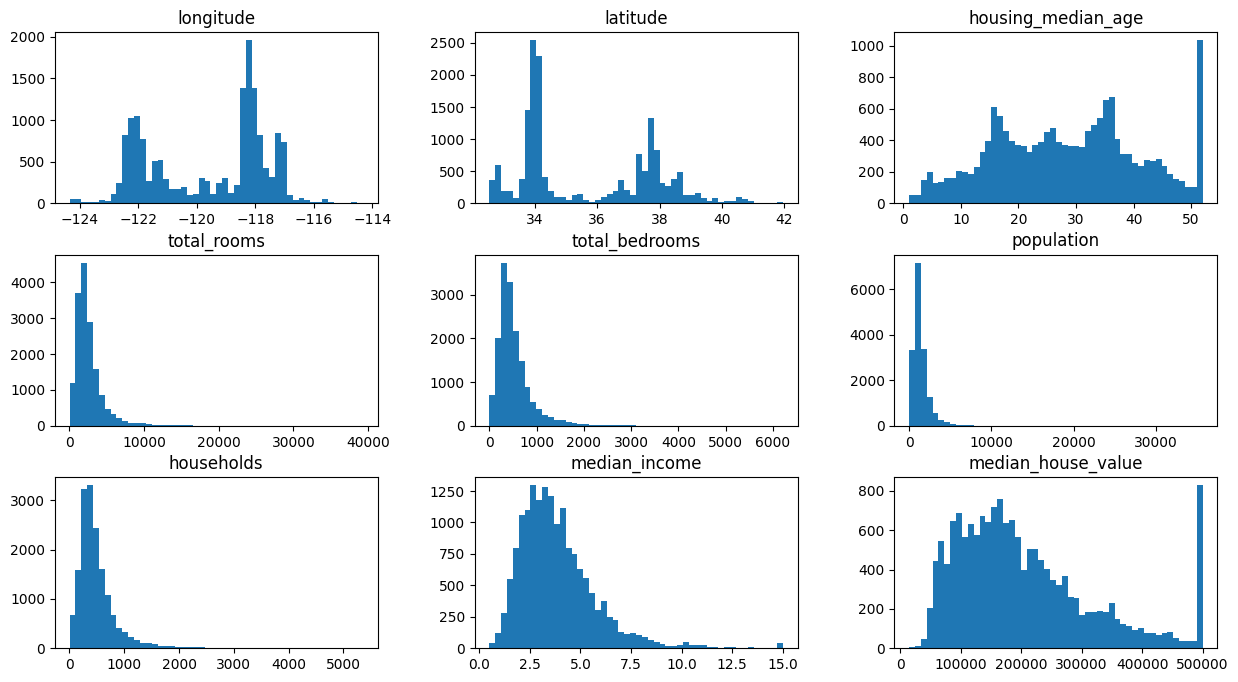

In [17]:
train_data.hist(figsize=(15, 8), bins=50, grid=False)

Text(0.5, 1.0, 'Correlation Heatmap')

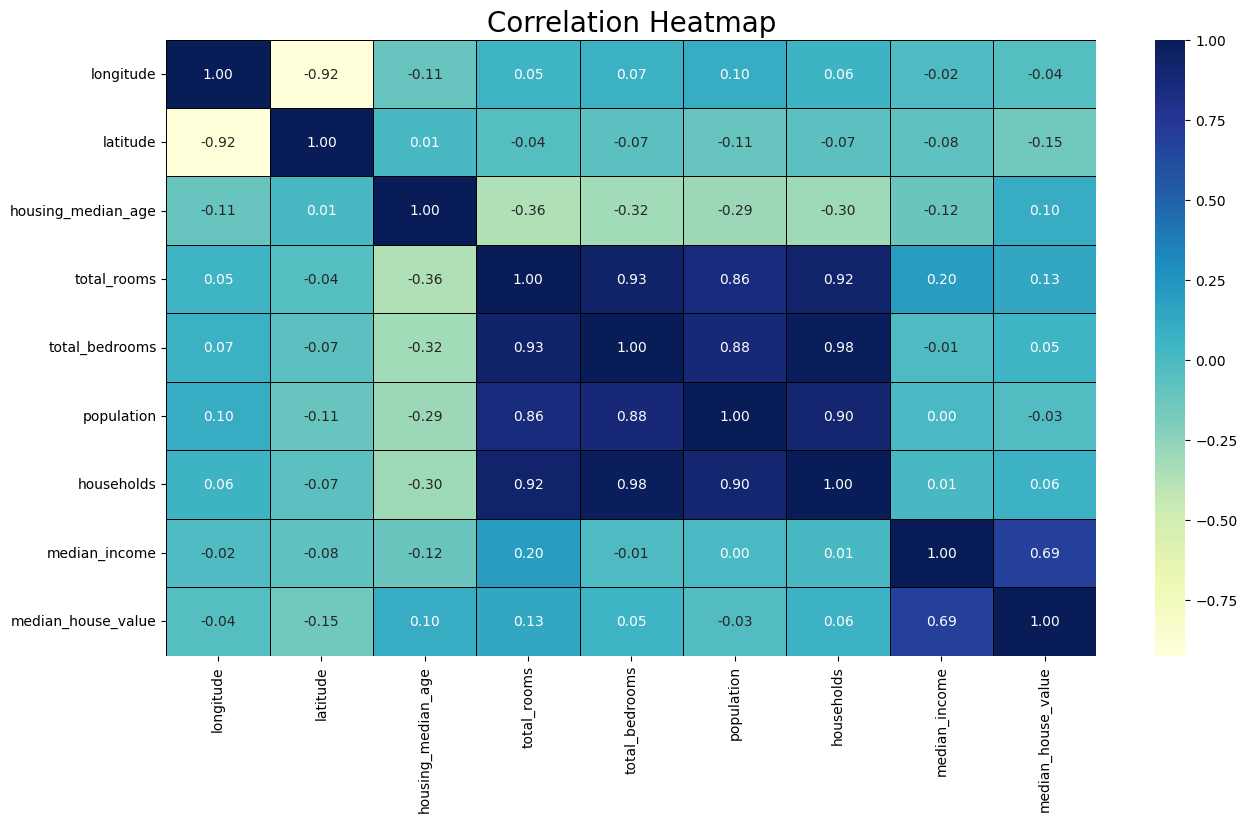

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontsize=20)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

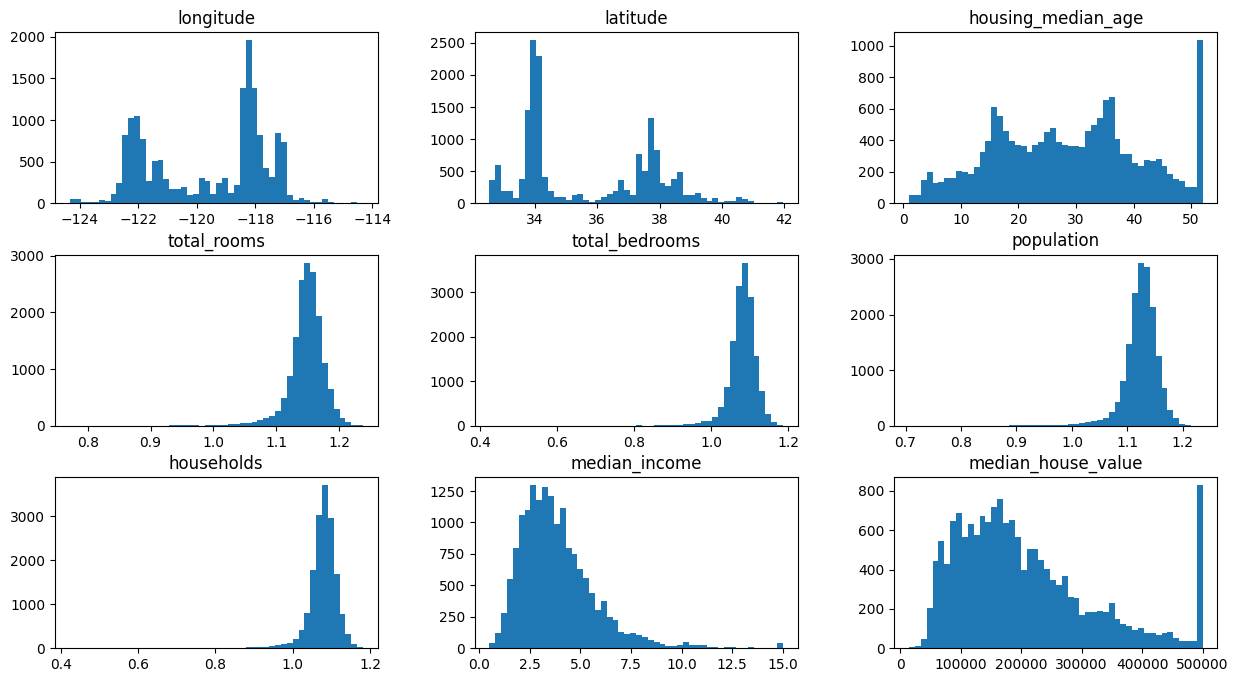

In [22]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1) 
train_data.hist(figsize=(15, 8), bins=50, grid=False)

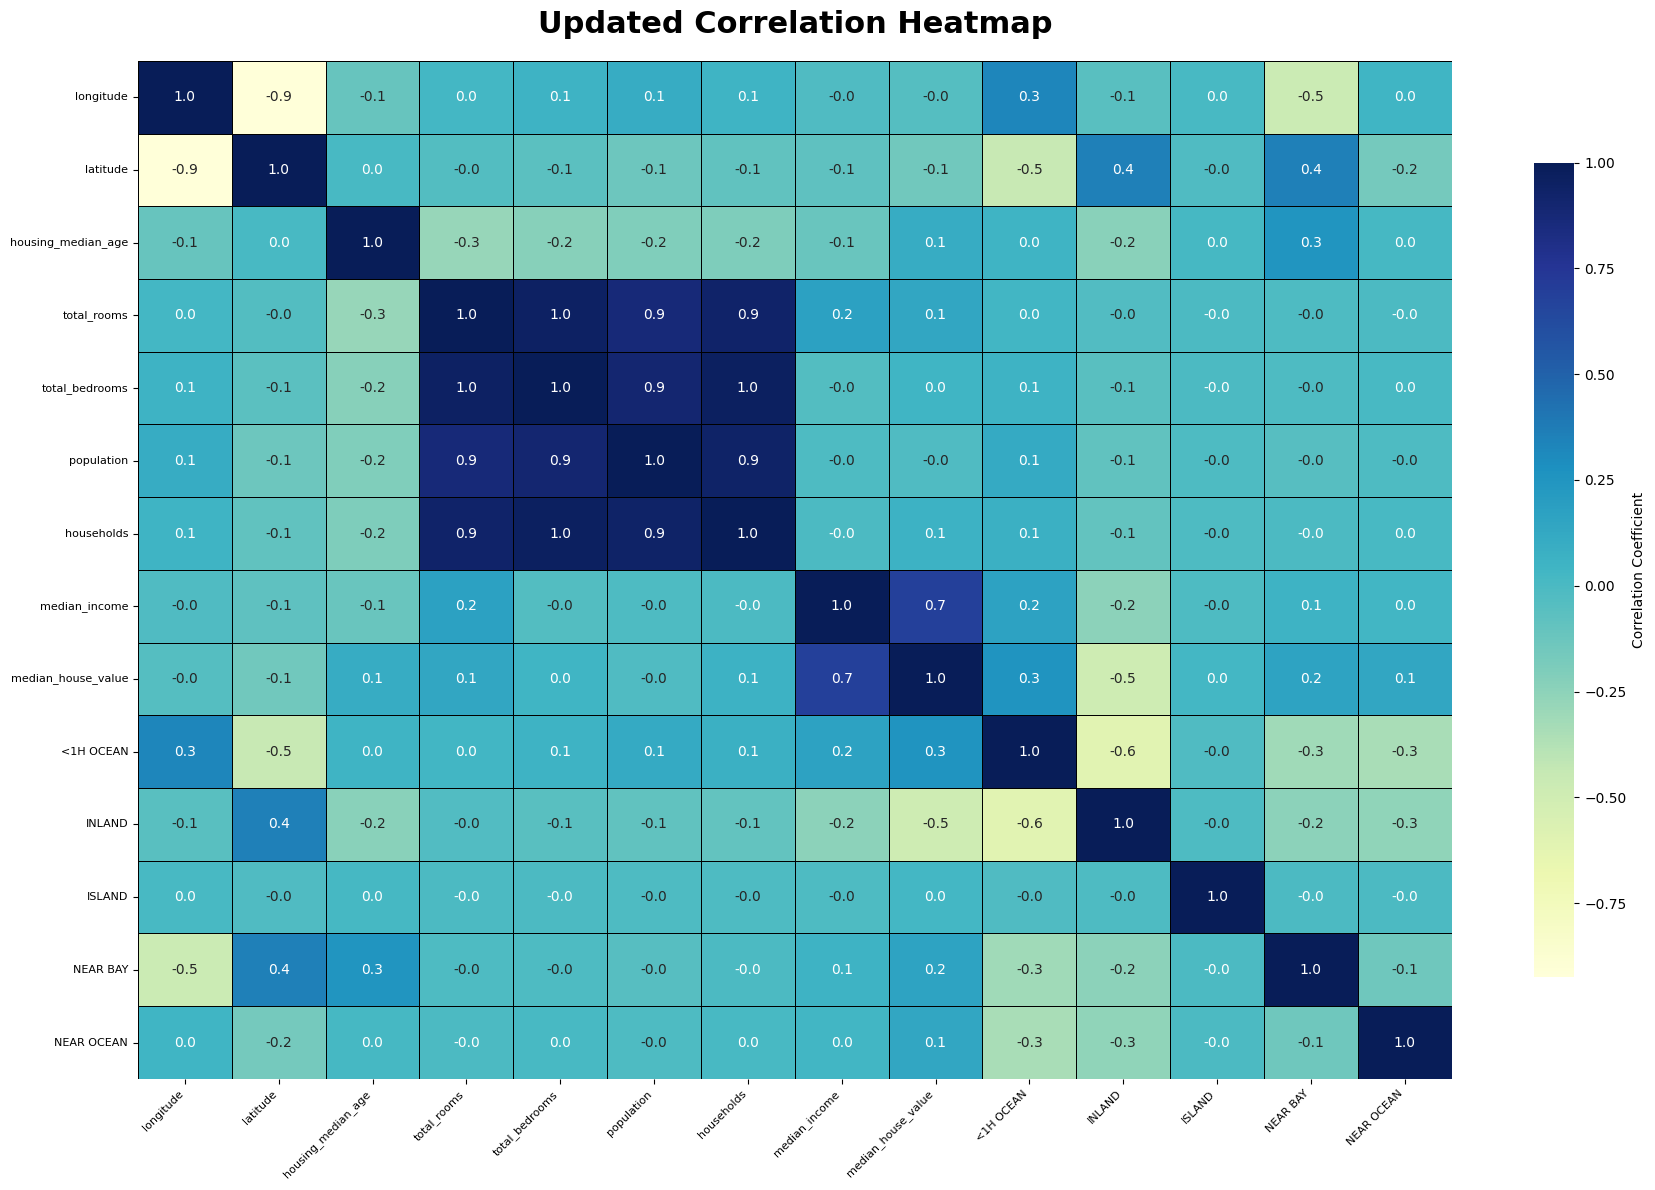

In [46]:
#train_data.ocean_proximity.value_counts()
#train_data.info()
#train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
#plt.figure(figsize=(15, 8))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))  # Bigger blocks (increase figure size)

sns.heatmap(
    train_data.corr(),
    annot=True,
    fmt=".1f",                # Rounded to 1 decimal place
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='black',
    square=False,             # Turned off to make cells larger
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title('Updated Correlation Heatmap', fontsize=22, weight='bold', pad=20)

# Smaller axis font sizes
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'latitude vs longitude')

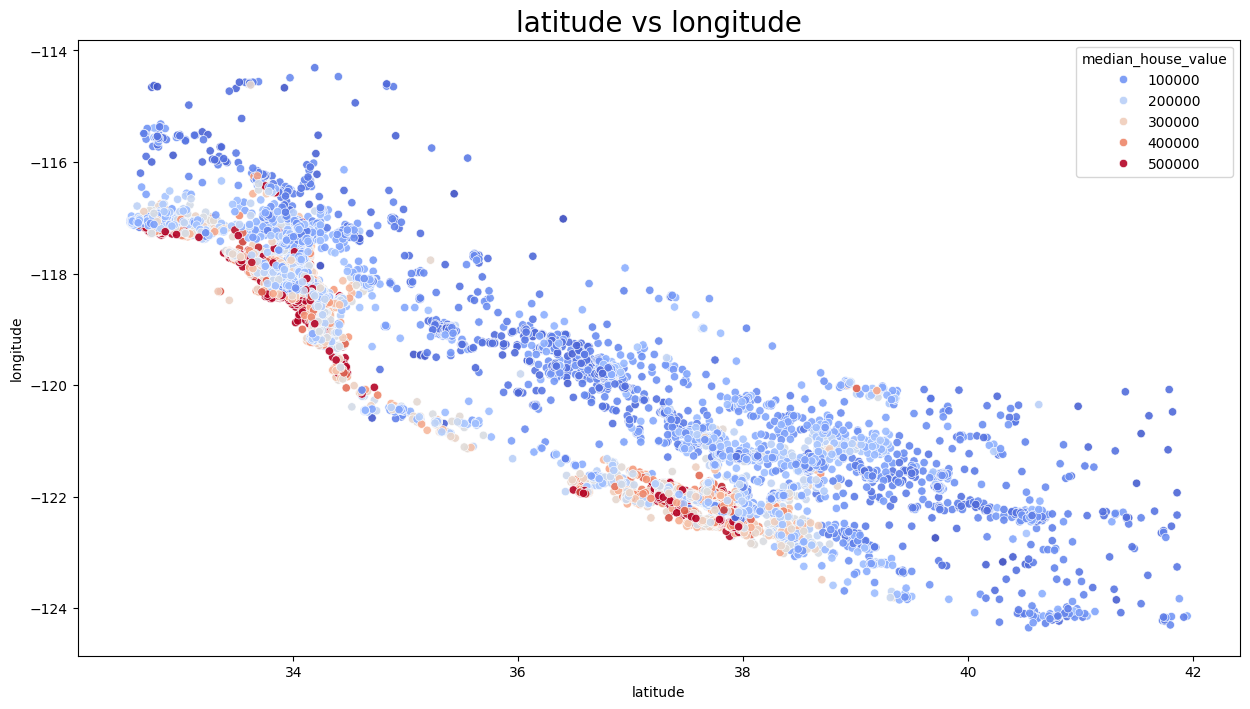

In [50]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue="median_house_value",palette="coolwarm", alpha=0.9)
plt.title('latitude vs longitude', fontsize=20)